# Обработка признаков (часть 1).

Цель лабораторной работы: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

In [ ]:
# подключение библиотек
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math as math
import seaborn as sns #
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px #
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS

<ipython-input-1-8f63410a912b>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Sleep_Efficiency.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

Caffeine consumption:the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)

Alcohol consumption:the amount of alcohol consumed in the 24 hours prior to bedtime (in oz)

Exercise frequency:the number of times the test subject exercises each week

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [ ]:
# shape of the data
df.shape

(452, 15)

#1.устранение пропусков в данных;

check for missing values

In [ ]:
# number of missing values for each column
print("Number of missing values:\n")
print("by column:")
nan_val_count = df.isnull().sum()
print(nan_val_count, "\n")

som = nan_val_count.sum()
print("Total:", som, end= " ~")
print(round(som / (df.shape[0] * df.shape[1]) * 100), "% of the dataset")

Number of missing values:

by column:
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64 

Total: 67 ~1 % of the dataset


replacing missing values with mean

In [ ]:
# replace null values with mean
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [ ]:
# checking for null values
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [ ]:
# cheching for duplicates
df.duplicated().sum()

0

# 2.кодирование категориальных признаков;

 We can make the data a little more organized by clearing the spaces in the column names and converting them all to lowercase.

In [ ]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
print(df.columns)

Index(['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'smoking_status', 'exercise_frequency'],
      dtype='object')


In [ ]:
# drop the ID column
df = df.drop(['id', 'bedtime', 'wakeup_time'], axis='columns')
df.head()

,age,gender,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,65,Female,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
# split the data into features and target
# 从 DataFrame 对象中提取特征矩阵 X
X_cate = df.loc[:, ['gender', 'smoking_status']]

# 查看特征矩阵的维度大小
print(X_cate.shape)

X_cate.head()

(452, 2)


,gender,smoking_status
0,Female,Yes
1,Male,Yes
2,Female,No
3,Female,Yes
4,Male,No


# Instantiate the OneHotEncoder class and encode the data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 实例化 OneHotEncoder 类并对数据进行编码
encoder = OneHotEncoder()
X_cate_encoded = encoder.fit_transform(X_cate)

In [ ]:
# 将编码后的数据集转换成 Pandas DataFrame 对象
X_cate_encoded_df = pd.DataFrame(X_cate_encoded.toarray())

# 查看原数据集的前 5 行
print('First 5 rows of the original dataset：\n', X_cate.head())

# 查看编码后的数据集的前 5 行
print('First 5 rows of the coded dataset：\n', X_cate_encoded_df.head())

# 查看编码后的数据集的形状
print('The shape of the data set after encoding：', X_cate_encoded.shape)

First 5 rows of the original dataset：
    gender smoking_status
0  Female            Yes
1    Male            Yes
2  Female             No
3  Female            Yes
4    Male             No
First 5 rows of the coded dataset：
      0    1    2    3
0  1.0  0.0  0.0  1.0
1  0.0  1.0  0.0  1.0
2  1.0  0.0  1.0  0.0
3  1.0  0.0  0.0  1.0
4  0.0  1.0  1.0  0.0
The shape of the data set after encoding： (452, 4)


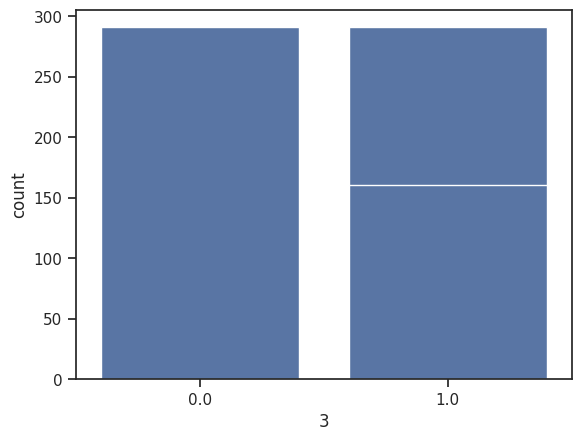

In [ ]:
import seaborn as sns

# 绘制编码后的数据集中，每个二进制虚拟变量的计数情况
sns.set(style="ticks")
sns.color_palette("bright")
for feature in range(X_cate_encoded_df.shape[1]):
    sns.countplot(x=X_cate_encoded_df.iloc[:, feature], color='b')

#3.нормализация числовых признаков.

In [ ]:
X_num = df.loc[:, ['age','sleep_duration','rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption','exercise_frequency']]
print(X_num.shape)
print(X_num.head())

(452, 9)
   age  sleep_duration  rem_sleep_percentage  deep_sleep_percentage  \
0   65             6.0                    18                     70   
1   69             7.0                    24                     28   
2   40             8.0                    20                     70   
3   40             6.0                    28                     25   
4   57             8.0                    27                     55   

   light_sleep_percentage  awakenings  caffeine_consumption  \
0                      10         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   alcohol_consumption  exercise_frequency  
0                  0.0                 3.0  
1                  3.0                 3.0  
2                  0.0                 3.0  
3    

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num[['age','sleep_duration','rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption','exercise_frequency']] = scaler.fit_transform(X_num[['age','sleep_duration','rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption','exercise_frequency']])

In [ ]:
print(X_num.head())


        age  sleep_duration  rem_sleep_percentage  deep_sleep_percentage  \
0  0.933333             0.2              0.200000               0.909091   
1  1.000000             0.4              0.600000               0.145455   
2  0.516667             0.6              0.333333               0.909091   
3  0.516667             0.2              0.866667               0.090909   
4  0.800000             0.6              0.800000               0.636364   

   light_sleep_percentage  awakenings  caffeine_consumption  \
0                0.061224        0.00                  0.00   
1                0.938776        0.75                  0.00   
2                0.061224        0.25                  0.00   
3                0.918367        0.75                  0.25   
4                0.224490        0.75                  0.00   

   alcohol_consumption  exercise_frequency  
0                  0.0                 0.6  
1                  0.6                 0.6  
2                  0.0       

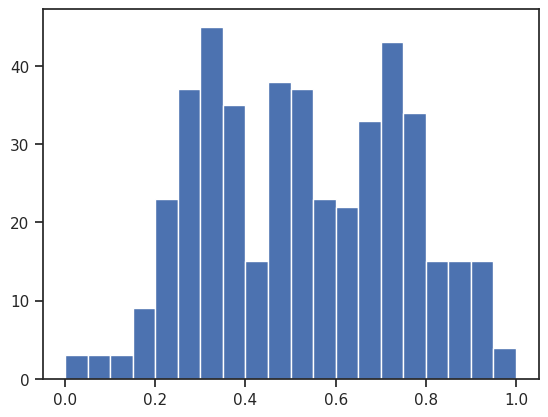

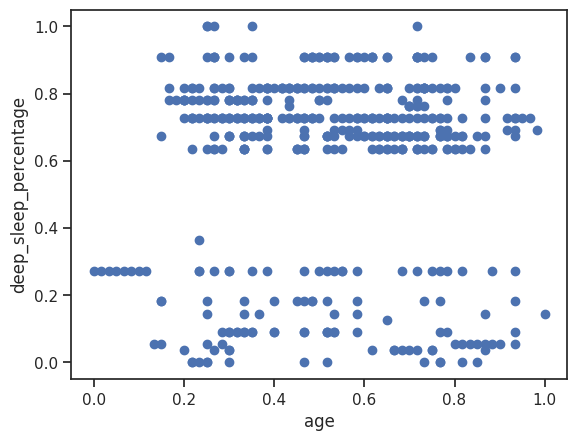

In [ ]:
import matplotlib.pyplot as plt

# 查看规范化后的某一列数据的分布情况
plt.hist(X_num['age'], bins=20)
plt.show()

# 查看规范化后的两列数据的关系情况
plt.scatter(X_num['age'], X_num['deep_sleep_percentage'])
plt.xlabel('age')
plt.ylabel('deep_sleep_percentage')
plt.show()
